In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Input

In [2]:
a = tf.constant(2)
b = tf.constant(3)

In [3]:
def compute(a,b):
    return tf.pow(
                tf.add(
                        tf.multiply(2, a),
                        tf.multiply(3, b)
                        ),
                    2)

In [4]:
compute(100, 200)

<tf.Tensor: id=10, shape=(), dtype=int32, numpy=640000>

In [5]:
iris = load_iris()
attributes, labels = iris.data, iris.target

In [6]:
labels_onehot = tf.one_hot(labels, depth = 3).numpy()

In [7]:
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape = (4,)), # Not required
tf.keras.layers.Dense(3, activation = "sigmoid")
])

In [8]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy")

In [9]:
model.fit(attributes, labels_onehot, epochs = 50)

Train on 150 samples
Epoch 1/50
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
150/150 [==============================] - 0s 3ms/sample - loss: 1.3222
Epoch 2/50
150/150 [==============================] - 0s 66us/sample - loss: 1.3017
Epoch 3/50
150/150 [==============================] - 0s 73us/sample - loss: 1.2820
Epoch 4/50
150/150 [==============================] - 0s 73us/sample - loss: 1.2635
Epoch 5/50
150/150 [==============================] - 0s 66us/sample - loss: 1.2455
Epoch 6/50
150/150 [==============================] - 0s 86us/sample - loss: 1.2287
Epoch 7/50
150/150 [==============================] - 0s 73us/sample - loss: 1.2126
Epoch 8/50
150/150 [==============================] - 0s 73us/sample - loss: 1.1976
Epoch 9/50
150/150 [==============================] - 0s 66us/sample - loss: 1.1825
Epoch 10/50
150/150 [==============================] - 0s 71us/sample - loss: 1.1688
Epoch 11/50
150/150 [========================

In [10]:
predictions = model.predict(attributes)

acc = tf.metrics.categorical_accuracy(
labels_onehot,
model.predict(attributes))

print(tf.math.reduce_mean(acc).numpy())

0.33333334


In [11]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
model = Sequential([
Flatten(),
Dense(512, activation = "relu"),
Dropout(0.2),
Dense(10, activation = "softmax")])

model.compile(
optimizer = "adam",
loss = "sparse_categorical_crossentropy",
metrics = ["accuracy"])

In [13]:
model.fit(x_train, y_train, epochs = 50)
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 121us/sample - loss: 0.2205 - accuracy: 0.9348
Epoch 2/50
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0959 - accuracy: 0.9702
Epoch 3/50
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0692 - accuracy: 0.9787
Epoch 4/50
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0532 - accuracy: 0.9827
Epoch 5/50
60000/60000 [==============================] - 7s 111us/sample - loss: 0.0437 - accuracy: 0.9859
Epoch 6/50
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0367 - accuracy: 0.9882
Epoch 7/50
60000/60000 [==============================] - 7s 116us/sample - loss: 0.0293 - accuracy: 0.9905
Epoch 8/50
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0285 - accuracy: 0.9903
Epoch 9/50
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0245 - accuracy: 0.9919
Epoch

[0.1499733498305766, 0.985]

In [14]:
a = tf.constant(30)
b = tf.constant(10)

In [15]:
tf.pow(tf.add(tf.multiply(2, a), tf.multiply(3, b)), 2)

<tf.Tensor: id=284389, shape=(), dtype=int32, numpy=8100>

In [16]:
bank_data = pd.read_csv("bank-full.csv", true_values= ["yes"], false_values=["no"])

In [17]:
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,False,2143,True,False,unknown,5,may,261,1,-1,0,unknown,False
1,44,technician,single,secondary,False,29,True,False,unknown,5,may,151,1,-1,0,unknown,False
2,33,entrepreneur,married,secondary,False,2,True,True,unknown,5,may,76,1,-1,0,unknown,False
3,47,blue-collar,married,unknown,False,1506,True,False,unknown,5,may,92,1,-1,0,unknown,False
4,33,unknown,single,unknown,False,1,False,False,unknown,5,may,198,1,-1,0,unknown,False


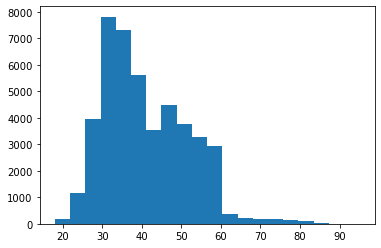

In [18]:
plt.hist(bank_data.age, bins = 20)
plt.show()

In [19]:
bank_data = pd.get_dummies(bank_data)

In [20]:
bank_data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,False,2143,True,False,5,261,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,False,29,True,False,5,151,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
2,33,False,2,True,True,5,76,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,False,1506,True,False,5,92,1,-1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,False,1,False,False,5,198,1,-1,0,...,0,0,1,0,0,0,0,0,0,1


In [21]:
bank_data = bank_data.astype(np.float32)

In [22]:
bank_data.dtypes

age                    float32
default                float32
balance                float32
housing                float32
loan                   float32
day                    float32
duration               float32
campaign               float32
pdays                  float32
previous               float32
y                      float32
job_admin.             float32
job_blue-collar        float32
job_entrepreneur       float32
job_housemaid          float32
job_management         float32
job_retired            float32
job_self-employed      float32
job_services           float32
job_student            float32
job_technician         float32
job_unemployed         float32
job_unknown            float32
marital_divorced       float32
marital_married        float32
marital_single         float32
education_primary      float32
education_secondary    float32
education_tertiary     float32
education_unknown      float32
contact_cellular       float32
contact_telephone      float32
contact_

In [23]:
[bank_data.values[:, i] for i in range(bank_data.shape[1])]

[array([58., 44., 33., ..., 72., 57., 37.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([2.143e+03, 2.900e+01, 2.000e+00, ..., 5.715e+03, 6.680e+02,
        2.971e+03], dtype=float32),
 array([1., 1., 1., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 0.], dtype=float32),
 array([ 5.,  5.,  5., ..., 17., 17., 17.], dtype=float32),
 array([ 261.,  151.,   76., ..., 1127.,  508.,  361.], dtype=float32),
 array([1., 1., 1., ..., 5., 4., 2.], dtype=float32),
 array([ -1.,  -1.,  -1., ..., 184.,  -1., 188.], dtype=float32),
 array([ 0.,  0.,  0., ...,  3.,  0., 11.], dtype=float32),
 array([0., 0., 0., ..., 1., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 0., 1., 0.], dtype=float32),
 array([0., 0., 1., ..., 0., 0., 1.], dtype=float32),
 array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([1., 0., 0., ..., 0., 0., 0.], dtype=float32),
 array([0., 0., 0., ..., 1., 0., 0.], 

In [24]:
attributes = bank_data.drop(["y"], axis = 1)
target = bank_data["y"]

In [25]:
min(target)

0.0

In [26]:
max(target)

1.0

In [27]:
min_max_scale = lambda col: (col - tf.reduce_min(col)) / (tf.reduce_max(col) - tf.reduce_min(col))

In [28]:
num_columns = attributes.shape[1]
transformed_columns = [min_max_scale(attributes.values[:, i]) for i in range(num_columns)]

In [29]:
tf.reduce_min(transformed_columns[0])

<tf.Tensor: id=285591, shape=(), dtype=float32, numpy=0.0>

In [30]:
tf.reduce_max(transformed_columns[0])

<tf.Tensor: id=285593, shape=(), dtype=float32, numpy=1.0>

In [31]:
bank_data_transformed = tf.stack(transformed_columns, axis = 1)

In [32]:
bank_data_transformed.shape

TensorShape([45211, 48])

In [33]:
target.shape

(45211,)

In [34]:
target

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
45206    1.0
45207    1.0
45208    1.0
45209    0.0
45210    0.0
Name: y, Length: 45211, dtype: float32

In [35]:
target = target.astype(int).values

In [36]:
target_onehot = tf.one_hot(target, depth=2)

In [37]:
logistic_regression = Sequential([
    Input(shape = num_columns),
    Dense(2, activation='sigmoid')
])

In [38]:
logistic_regression.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 98        
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


In [39]:
logistic_regression = Sequential([
    Input(shape = num_columns),
    Dense(2, activation='sigmoid')
])

In [40]:
logistic_regression.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 2)                 98        
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


In [41]:
logistic_regression.compile(optimizer = "adam", loss = "binary_crossentropy")

In [42]:
logistic_regression.fit(x = bank_data_transformed, y = target_onehot, epochs = 20)

Train on 45211 samples
Epoch 1/20
45211/45211 [==============================] - 2s 52us/sample - loss: 0.3604
Epoch 2/20
45211/45211 [==============================] - 2s 45us/sample - loss: 0.3034
Epoch 3/20
45211/45211 [==============================] - 2s 45us/sample - loss: 0.29260s - loss: 0
Epoch 4/20
45211/45211 [==============================] - 2s 45us/sample - loss: 0.2859
Epoch 5/20
45211/45211 [==============================] - 2s 45us/sample - loss: 0.2807
Epoch 6/20
45211/45211 [==============================] - 2s 49us/sample - loss: 0.2761
Epoch 7/20
45211/45211 [==============================] - 2s 44us/sample - loss: 0.2720
Epoch 8/20
45211/45211 [==============================] - 2s 46us/sample - loss: 0.2684
Epoch 9/20
45211/45211 [==============================] - 2s 51us/sample - loss: 0.2651
Epoch 10/20
45211/45211 [==============================] - 2s 51us/sample - loss: 0.2622
Epoch 11/20
45211/45211 [==============================] - 3s 68us/sample - loss: 0.

In [43]:
nn = Sequential([
    Input(shape = num_columns),
    Dense(30, activation='relu'),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [44]:
nn.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 30)                1470      
_________________________________________________________________
dense_6 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_7 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 22        
Total params: 2,322
Trainable params: 2,322
Non-trainable params: 0
_________________________________________________________________


In [45]:
nn.compile(optimizer = "adam", loss = "binary_crossentropy")

In [46]:
nn.fit(x = bank_data_transformed, y = target_onehot, epochs = 20)

Train on 45211 samples
Epoch 1/20
45211/45211 [==============================] - 3s 66us/sample - loss: 0.2859
Epoch 2/20
45211/45211 [==============================] - 2s 54us/sample - loss: 0.2224
Epoch 3/20
45211/45211 [==============================] - 3s 57us/sample - loss: 0.2153
Epoch 4/20
45211/45211 [==============================] - 3s 59us/sample - loss: 0.2109
Epoch 5/20
45211/45211 [==============================] - 2s 55us/sample - loss: 0.2075
Epoch 6/20
45211/45211 [==============================] - 2s 55us/sample - loss: 0.2043
Epoch 7/20
45211/45211 [==============================] - 3s 63us/sample - loss: 0.2032
Epoch 8/20
45211/45211 [==============================] - 4s 83us/sample - loss: 0.2013
Epoch 9/20
45211/45211 [==============================] - 3s 58us/sample - loss: 0.1998
Epoch 10/20
45211/45211 [==============================] - 3s 58us/sample - loss: 0.1993
Epoch 11/20
45211/45211 [==============================] - 3s 56us/sample - loss: 0.1984
Epoch 1